<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/5_4_Dendrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

▶️ 자동으로 판단된 절단 높이 (cut height): 11.53


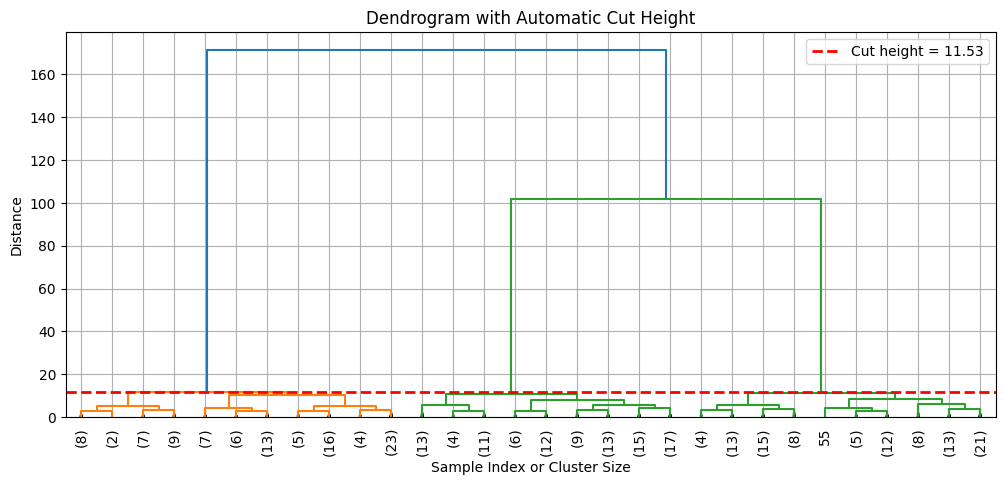

▶️ 자동으로 결정된 클러스터 수: 3개


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

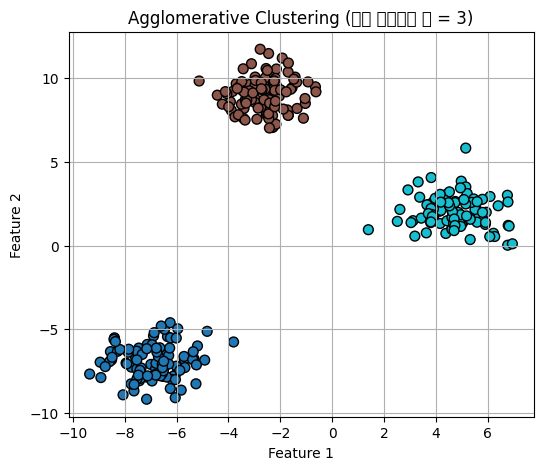

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from matplotlib import cm

# 1️⃣ 데이터 생성
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# 2️⃣ linkage matrix 생성
linked = linkage(X, method='ward')

# 3️⃣ 병합 거리 및 변화량 계산
distances = linked[:, 2]
diff = np.diff(distances)
cut_height = distances[np.argmax(diff)]
print(f"▶️ 자동으로 판단된 절단 높이 (cut height): {cut_height:.2f}")

# 4️⃣ 덴드로그램 시각화 (절단선 포함)
plt.figure(figsize=(12, 5))
dendrogram(linked,
           truncate_mode='lastp',
           p=30,
           leaf_rotation=90.,
           leaf_font_size=10.,
           show_contracted=True)

# 🔴 절단 높이 시각화 (수평선 추가)
plt.axhline(y=cut_height, color='red', linestyle='--', linewidth=2,
            label=f"Cut height = {cut_height:.2f}")
plt.title("Dendrogram with Automatic Cut Height")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.legend()
plt.grid(True)
plt.show()

# 5️⃣ 클러스터 할당
cluster_labels = fcluster(linked, t=cut_height, criterion='distance')
n_clusters = len(np.unique(cluster_labels))
print(f"▶️ 자동으로 결정된 클러스터 수: {n_clusters}개")

# 6️⃣ 결과 시각화
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap=cm.tab10, edgecolor='k', s=50)
plt.title(f"Agglomerative Clustering (자동 클러스터 수 = {n_clusters})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
